In [33]:
import pandas as  pd
import numpy as np
import seaborn
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
seaborn.set()
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [34]:
housing_data = pd.read_csv('HousingData.csv')
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [35]:
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [36]:
housing_data_no_null = housing_data.dropna(axis=0)

In [37]:
housing_data_no_null.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [38]:
inputs = housing_data_no_null.drop(['MEDV'], axis=1)
targets = housing_data_no_null['MEDV']

In [39]:
scaled_inputs = StandardScaler().fit_transform(inputs)
targets

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [40]:
reg1 = LinearRegression()
reg1.fit(scaled_inputs, targets)

LinearRegression()

In [41]:
#Taking the log of target for making graph linear
targets = np.log(targets)

In [42]:
#MAKING CRIM LINEAR
log_crim = np.log(inputs['CRIM'])

<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

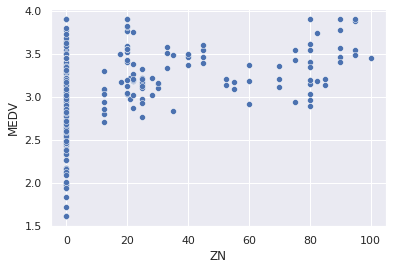

In [43]:
#MAKING ZN LINEAR
seaborn.scatterplot(inputs['ZN'], targets)

In [44]:
#REMOVING CHAS AND RAD BECAUSE OF NON LINEARITY
inputs = inputs.drop(['CHAS','RAD'], axis=1)

In [45]:
inputs_scaled = StandardScaler().fit_transform(inputs)

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=36)
reg = LinearRegression()
reg.fit(x_train, y_train)

y_hat = reg.predict(x_train)

In [46]:
y_hat_test = reg.predict(x_test)

In [47]:
reg.score(x_train, y_train)

0.7830670264615517

In [48]:
r2 = reg.score(x_train,y_train)
n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7751915719766576